<a href="https://colab.research.google.com/github/shh2003/Machine-Learning/blob/main/week04/Mhealth_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D
from tensorflow.keras.layers import concatenate
from keras.utils import to_categorical


In [2]:
from google.colab import drive
import pandas as pd
import glob
import re

# Google Drive ÎßàÏö¥Ìä∏
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# MHEALTHDATASET Ìè¥Îçî Í≤ΩÎ°ú
data_path = "/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET"

# Î™®Îì† .log ÌååÏùº Í≤ΩÎ°ú Í∞ÄÏ†∏Ïò§Í∏∞
log_files = glob.glob(data_path + "/mHealth_subject*.log")

print("ÌååÏùº Î™©Î°ù:")
for f in log_files:
    print(f)


ÌååÏùº Î™©Î°ù:
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject3.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject4.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject10.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject2.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject1.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject8.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject7.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject6.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject5.log
/content/drive/MyDrive/Colab Notebooks/MHEALTHDATASET/mHealth_subject9.log


In [4]:
# Í∞Å ÌååÏùºÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏùΩÏñ¥ Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
all_data_frames = []
for file_path in log_files:
    # ÌååÏùºÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏùΩÏñ¥ÏòµÎãàÎã§. (ÌÉ≠ÏúºÎ°ú Íµ¨Î∂Ñ, Ìó§Îçî ÏóÜÏùå)
    df = pd.read_csv(file_path, sep='\t', header=None)

    # ÌååÏùº Í≤ΩÎ°úÏóêÏÑú subject Î≤àÌò∏Î•º Ï∂îÏ∂úÌï©ÎãàÎã§.

    match = re.search(r'subject(\d+)', file_path)
    if match:
        subject_id = int(match.group(1))
        # 'subject' Ïó¥ÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
        df['subject'] = subject_id
        all_data_frames.append(df)

# Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÎ°ú ÌÜµÌï©Ìï©ÎãàÎã§.

combined_df = pd.concat(all_data_frames, ignore_index=True)



combined_df.head()



0        1       2        3         4        5       6        7  \
0  -9.4674  0.13721  1.0545  0.23862 -0.033490 -0.18848 -9.8425  0.90183   
1  -9.5991  0.15481  1.1824  0.22606 -0.079540 -0.36263 -9.7832  0.89263   
2  -9.8612  0.13317  1.0646  0.20513 -0.096285 -0.24823 -9.8010  1.09080   
3  -9.6398  0.17406  1.2367  0.18420 -0.062794 -0.25027 -9.6730  1.01380   
4 -10.0360  0.26062  1.2761  0.12559 -0.025118 -0.20668 -9.9102  1.05450   

         8        9  ...      15      16       17       18       19        20  \
0  0.55659 -0.83490  ...  2.0431  1.3105 -0.75490 -0.22998  0.78233 -1.605100   
1  0.55659 -0.83490  ...  1.8242  1.4245 -0.75490 -0.22998  0.78233 -2.101500   
2  0.57885 -0.84615  ...  2.4401  1.0074 -0.75490 -0.22998  0.78233  0.565620   
3  0.57885 -0.84615  ...  1.9019  1.1888 -0.75490 -0.22998  0.78233  0.244770   
4  0.57885 -0.84615  ...  2.0140  1.4028 -0.75294 -0.22998  0.76293  0.034368   

       21       22  23  subject  
0  1.0685 -3.65290   0        3  
1  5.2904  0.62709   0        3  
2  2.7021 -1.45980   0        3  
3  6.5233 -0.78236   0        3  
4  3.4368 -1.11670   0        3  

[5 rows x 25 columns]

In [5]:
# MHEALTH Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïª¨ÎüºÎ™ÖÏùÑ ÏàúÏÑúÎåÄÎ°ú Î¶¨Ïä§Ìä∏Î°ú Ï†ïÏùòÌï©ÎãàÎã§.

column_names = [
    'acc_ch_x', 'acc_ch_y', 'acc_ch_z', # Chest Accelerometer
    'ecg_1', 'ecg_2',                  # Electrocardiogram (Ïù¥ Î∂ÄÎ∂ÑÏù¥ Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§)
    'acc_la_x', 'acc_la_y', 'acc_la_z', # Left-Ankle Accelerometer
    'gyr_la_x', 'gyr_la_y', 'gyr_la_z', # Left-Ankle Gyroscope
    'mag_la_x', 'mag_la_y', 'mag_la_z', # Left-Ankle Magnetometer
    'acc_rw_x', 'acc_rw_y', 'acc_rw_z', # Right-Wrist Accelerometer
    'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z', # Right-Wrist Gyroscope
    'mag_rw_x', 'mag_rw_y', 'mag_rw_z', # Right-Wrist Magnetometer
    'activity',
    'subject'
]

combined_df.columns = column_names
# Í≤∞Í≥º ÌôïÏù∏

print("\n## üìä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎØ∏Î¶¨Î≥¥Í∏∞")
combined_df


## üìä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎØ∏Î¶¨Î≥¥Í∏∞


acc_ch_x  acc_ch_y  acc_ch_z    ecg_1     ecg_2  acc_la_x  acc_la_y  \
0         -9.4674   0.13721  1.054500  0.23862 -0.033490  -0.18848   -9.8425   
1         -9.5991   0.15481  1.182400  0.22606 -0.079540  -0.36263   -9.7832   
2         -9.8612   0.13317  1.064600  0.20513 -0.096285  -0.24823   -9.8010   
3         -9.6398   0.17406  1.236700  0.18420 -0.062794  -0.25027   -9.6730   
4        -10.0360   0.26062  1.276100  0.12559 -0.025118  -0.20668   -9.9102   
...           ...       ...       ...      ...       ...       ...       ...   
1215740  -12.2440  -2.97060 -0.035772  0.81214  1.096800   0.57061   -2.5602   
1215741  -10.9220  -3.41900 -0.339280  1.46940  1.285200   5.26840   -4.9331   
1215742   -9.4842  -3.06430 -1.033700  0.23862  0.891680   0.53805   -5.9706   
1215743   -8.7889  -2.47570 -0.612290 -0.20513  0.460490   1.56950   -7.9809   
1215744   -8.6851  -1.09850  0.153770  0.31816  0.908420   3.43700  -10.8690   

         acc_la_z  gyr_la_x  gyr_la_y  ...  acc_rw_y  acc_rw_z  gyr_rw_x  \
0         0.90183  0.556590  -0.83490  ...    2.0431    1.3105  -0.75490   
1         0.89263  0.556590  -0.83490  ...    1.8242    1.4245  -0.75490   
2         1.09080  0.578850  -0.84615  ...    2.4401    1.0074  -0.75490   
3         1.01380  0.578850  -0.84615  ...    1.9019    1.1888  -0.75490   
4         1.05450  0.578850  -0.84615  ...    2.0140    1.4028  -0.75294   
...           ...       ...       ...  ...       ...       ...       ...   
1215740   0.41936 -0.055659   0.64165  ...  -16.9660    2.3704   0.10980   
1215741   9.66020 -0.055659   0.64165  ...  -13.3900    2.9972   0.10980   
1215742   2.93600 -0.055659   0.64165  ...  -11.3790    3.1498   0.10980   
1215743  -2.05000 -0.085343   0.43715  ...  -10.0000    3.0000   0.11961   
1215744   2.22010 -0.085343   0.43715  ...   -8.9374    3.2615   0.11961   

         gyr_rw_y  gyr_rw_z   mag_rw_x  mag_rw_y  mag_rw_z  activity  subject  
0        -0.22998   0.78233  -1.605100    1.0685  -3.65290         0        3  
1        -0.22998   0.78233  -2.101500    5.2904   0.62709         0        3  
2        -0.22998   0.78233   0.565620    2.7021  -1.45980         0        3  
3        -0.22998   0.78233   0.244770    6.5233  -0.78236         0        3  
4        -0.22998   0.76293   0.034368    3.4368  -1.11670         0        3  
...           ...       ...        ...       ...       ...       ...      ...  
1215740  -0.99384   0.19181  -6.128700   15.4950  18.85600         0        9  
1215741  -0.99384   0.19181 -10.242000   17.1390  33.92000         0        9  
1215742  -0.99384   0.19181 -12.944000   16.1700  43.26200         0        9  
1215743  -0.97331   0.15302 -14.524000    1.8494  43.37300         0        9  
1215744  -0.97331   0.15302 -14.162000  -15.8330  35.97600         0        9  

[1215745 rows x 25 columns]

In [6]:
combined_df.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'ecg_1', 'ecg_2', 'acc_la_x',
       'acc_la_y', 'acc_la_z', 'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x',
       'mag_la_y', 'mag_la_z', 'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x',
       'gyr_rw_y', 'gyr_rw_z', 'mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity',
       'subject'],
      dtype='object')

In [7]:
combined_df.isnull().sum()

acc_ch_x    0
acc_ch_y    0
acc_ch_z    0
ecg_1       0
ecg_2       0
acc_la_x    0
acc_la_y    0
acc_la_z    0
gyr_la_x    0
gyr_la_y    0
gyr_la_z    0
mag_la_x    0
mag_la_y    0
mag_la_z    0
acc_rw_x    0
acc_rw_y    0
acc_rw_z    0
gyr_rw_x    0
gyr_rw_y    0
gyr_rw_z    0
mag_rw_x    0
mag_rw_y    0
mag_rw_z    0
activity    0
subject     0
dtype: int64

In [8]:
combined_df['subject'].value_counts()

subject
1     161280
9     135168
2     130561
8     129024
3     122112
5     119808
4     116736
7     104448
10     98304
6      98304
Name: count, dtype: int64

In [9]:
print("## 'activity' Ïª¨ÎüºÏùò Í∞í Î∂ÑÌè¨")
print(combined_df['activity'].value_counts())

## 'activity' Ïª¨ÎüºÏùò Í∞í Î∂ÑÌè¨
activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
5      30720
11     30720
10     30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64


In [10]:
combined_df.shape

(1215745, 25)

In [11]:
X = combined_df.drop(['subject', 'activity'], axis=1)
y = combined_df['activity']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# 1. LabelEncoder Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
encoder = LabelEncoder()

# 2. fit_transform()ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 'y' Îç∞Ïù¥ÌÑ∞Î•º ÎùºÎ≤® Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§.
#    .values.reshape(-1, 1) Î∂ÄÎ∂ÑÏù¥ ÌïÑÏöî ÏóÜÏñ¥ ÏΩîÎìúÍ∞Ä Îçî Í∞ÑÎã®Ìï¥ÏßëÎãàÎã§.
y_encoded = encoder.fit_transform(y)

In [14]:
print(f"ÌäπÏßï Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_scaled.shape}")
print(f"Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {y_encoded.shape}")

ÌäπÏßï Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1215745, 23)
Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1215745,)


In [15]:
window_size = 128
step = 64
# (Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú y_encodedÍ∞Ä LabelEncoderÎ°ú ÏÉùÏÑ±ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ï)

window_size = 128
step = 64
X_windows, y_windows = [], []

# ÏúàÎèÑÏö∞ ÏÉùÏÑ± Î£®ÌîÑ
for i in range(0, len(X_scaled) - window_size, step):
    # ÌäπÏßï Îç∞Ïù¥ÌÑ∞ ÏúàÎèÑÏö∞ Ï∂îÏ∂ú
    window = X_scaled[i : i + window_size]

    # Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ ÏúàÎèÑÏö∞ Ï∂îÏ∂ú
    label_vector = y_encoded[i : i + window_size]

    # ‚òÖ‚òÖ‚òÖ Ïù¥ Î∂ÄÎ∂ÑÏù¥ Î≥ÄÍ≤ΩÎêòÏóàÏäµÎãàÎã§ ‚òÖ‚òÖ‚òÖ
    # 1Ï∞®Ïõê Î∞∞Ïó¥(label_vector)ÏóêÏÑú Í∞ÄÏû• ÎπàÎ≤àÌïòÍ≤å Îì±Ïû•ÌïòÎäî Í∞íÏùÑ Ï∞æÏäµÎãàÎã§.
    # np.bincountÍ∞Ä Í∞Å Ïà´ÏûêÏùò ÎπàÎèÑÎ•º ÏÑ∏Í≥†, np.argmaxÍ∞Ä Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Ïà´ÏûêÎ•º Î∞òÌôòÌï©ÎãàÎã§.
    most_common_label = np.argmax(np.bincount(label_vector))

    X_windows.append(window)
    y_windows.append(most_common_label)

# Î¶¨Ïä§Ìä∏Î•º Numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

# Í≤∞Í≥º ÌôïÏù∏
print("ÏÉùÏÑ±Îêú X Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú:", X_windows.shape)
print("ÏÉùÏÑ±Îêú y Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú:", y_windows.shape)

ÏÉùÏÑ±Îêú X Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (18995, 128, 23)
ÏÉùÏÑ±Îêú y Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (18995,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_windows, y_windows, test_size=0.2, random_state=42, stratify=y_windows
)


In [17]:
# --- Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò (ÏàòÏ†ïÎê®) ---
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

# ‚òÖ 1. n_outputs Í≥ÑÏÇ∞ Î∞©Ïãù Î≥ÄÍ≤Ω ‚òÖ
# y_trainÏùò shapeÍ∞Ä ÏïÑÎãå, Í≥†Ïú†Ìïú Í∞íÏùò Í∞úÏàòÎ•º ÏÑ∏Ïñ¥ ÌÅ¥ÎûòÏä§ ÏàòÎ•º Íµ¨Ìï©ÎãàÎã§.
n_outputs = len(np.unique(y_train))

# --- Î™®Îç∏ Íµ¨Ï∂ï (Í∏∞Ï°¥Í≥º ÎèôÏùº) ---
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
    Dropout(0.5),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(n_outputs, activation='softmax')
])

# --- Î™®Îç∏ Ïª¥ÌååÏùº (loss Ìï®Ïàò Î≥ÄÍ≤ΩÎê®) ---
# ‚òÖ 2. loss Ìï®ÏàòÎ•º 'sparse_categorical_crossentropy'Î°ú Î≥ÄÍ≤Ω ‚òÖ
# ÎùºÎ≤® Ïù∏ÏΩîÎî©(Ï†ïÏàò Î†àÏù¥Î∏î)ÏùÑ ÏÇ¨Ïö©Ìï† ÎïåÎäî Î∞òÎìúÏãú sparse_categorical_crossentropyÎ•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d (Conv1D)                 ‚îÇ (None, 126, 64)        ‚îÇ         4,480 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 126, 64)        ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d (MaxPooling1D)    ‚îÇ (None, 63, 64)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 4032)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 100)            ‚îÇ       403,300 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 100)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 13)             ‚îÇ         1,313 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 409,093 (1.56 MB)

 Trainable params: 409,093 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:

# Î™®Îç∏ ÌõàÎ†®
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 10ms/step - accuracy: 0.6900 - loss: 1.1655 - val_accuracy: 0.8110 - val_loss: 0.4420
Epoch 2/10
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.7731 - loss: 0.5355 - val_accuracy: 0.8184 - val_loss: 0.3722
Epoch 3/10
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.7942 - loss: 0.4375 - val_accuracy: 0.8302 - val_loss: 0.3436
Epoch 4/10
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.8075 - loss: 0.4019 - val_accuracy: 0.8368 - val_loss: 0.3126
Epoch 5/10
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 5ms/step - accuracy: 0.8165 - loss: 0.3824 - val_accuracy: 0.8531 - val_loss: 0.3005
Epoch 6/10
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.8298 - loss: 0.3559 - val_accuracy: 0.8473 - val_los

In [19]:
def plot_history(history):
    plt.figure(figsize=(10, 8))
    sns.set_theme()
    # --- Ï†ïÌôïÎèÑ ---
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], 'r-', label='Train')
    plt.plot(history.history['val_accuracy'], 'b-', label='Val')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    # --- ÏÜêÏã§ ---
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], 'r-', label='Train')
    plt.plot(history.history['val_loss'], 'b-', label='Val')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

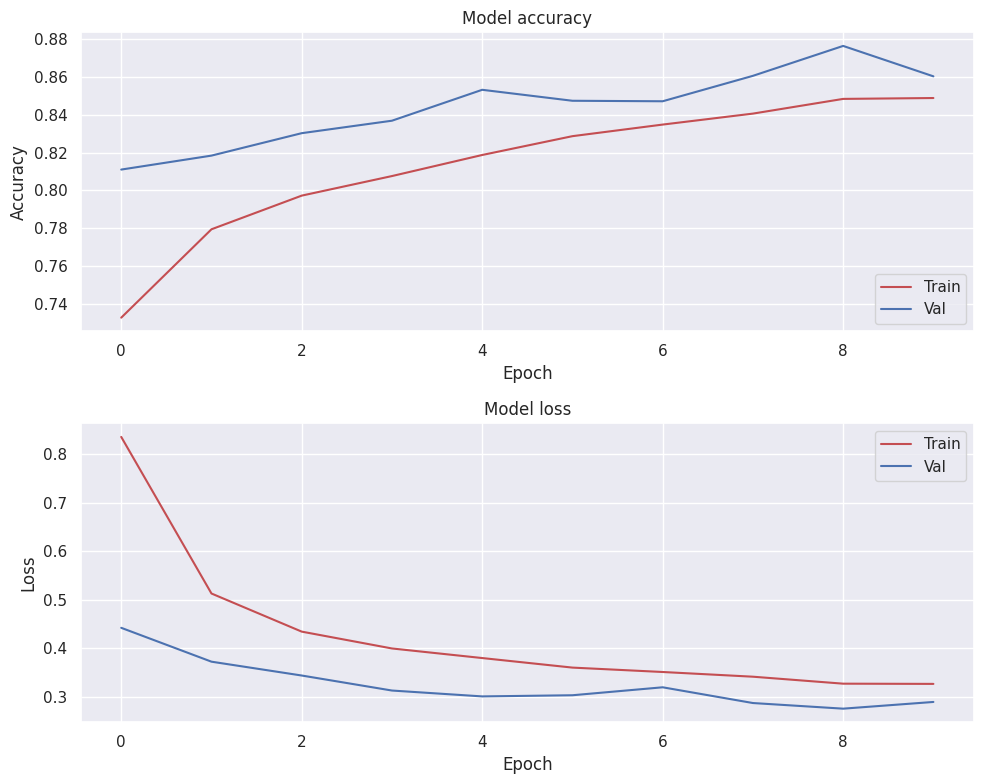

In [20]:
plot_history(history)

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Î™®Îç∏ ÏòàÏ∏° ---
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏Ïùò ÏòàÏ∏°Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
y_pred_probs = model.predict(X_test)

# ÏòàÏ∏°Í∞íÏùÄ ÌôïÎ•† ÌòïÌÉúÏù¥ÎØÄÎ°ú, Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò Ïù∏Îç±Ïä§Î•º ÎΩëÏïÑ 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì≠ÎãàÎã§.
y_pred = np.argmax(y_pred_probs, axis=1)

# y_testÎäî Ïù¥ÎØ∏ 1Ï∞®Ïõê Ï†ïÏàò Î∞∞Ïó¥Ïù¥ÎØÄÎ°ú, Î≥ÄÌôòÌï† ÌïÑÏöî ÏóÜÏù¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
y_true = y_test

# --- 2. ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†• ---
# Ïù¥Ï†ú y_trueÏôÄ y_predÏùò ÌòïÏãùÏù¥ ÎèôÏùºÌïòÎØÄÎ°ú, ÏïÑÎûò ÏΩîÎìúÍ∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ïã§ÌñâÎê©ÎãàÎã§.
print("\n[ Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú (Classification Report) ]")
print(classification_report(y_true, y_pred))

print("\n[ ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix) ]")
print(confusion_matrix(y_true, y_pred))

119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step

[ Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú (Classification Report) ]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2736
           1       0.67      0.85      0.75        95
           2       0.65      0.58      0.61        95
           3       0.73      1.00      0.84        95
           4       0.79      0.85      0.82        95
           5       0.87      0.43      0.58        95
           6       0.66      0.93      0.77        88
           7       0.73      0.79      0.76        91
           8       0.78      0.85      0.81        92
           9       0.84      0.68      0.76        95
          10       0.81      0.76      0.78        95
          11       0.70      0.99      0.82        95
          12       0.00      0.00      0.00        32

    accuracy                           0.86      3799
   macro avg       0.70      0.74      0.71      3799
weighte

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
# --- ÏµúÏ¢Ö ÌèâÍ∞Ä ÏöîÏïΩ Ìï®Ïàò Ï†ïÏùò ---
def results_summarizer(y_true, y_pred):
    """
    Î∂ÑÎ•ò Î™®Îç∏Ïùò ÌèâÍ∞Ä ÏßÄÌëúÏôÄ ÌòºÎèô ÌñâÎ†¨ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò.

    Args:
        y_true (array): Ïã§Ï†ú Ï†ïÎãµ Î†àÏù¥Î∏î (Ïà´Ïûê ÌòïÌÉú)
        y_pred (array): Î™®Îç∏Ïùò ÏòàÏ∏° Î†àÏù¥Î∏î (Ïà´Ïûê ÌòïÌÉú)
    """
    # 1. ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    # 2. ÌôúÎèô Ïù¥Î¶Ñ ÎßµÌïë (MHEALTH Îç∞Ïù¥ÌÑ∞ÏÖãÏùò 13Í∞ú Ï†ÑÏ≤¥ ÌôúÎèô)
    activity_map = {
        0: 'Null',
        1: 'Standing still',
        2: 'Sitting and relaxing',
        3: 'Lying down',
        4: 'Walking',
        5: 'Climbing stairs',
        6: 'Waist bends forward',
        7: 'Frontal elevation of arms',
        8: 'Knees bending (crouching)',
        9: 'Cycling',
        10: 'Jogging',
        11: 'Running',
        12: 'Jump front & back'
    }

    # 3. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=activity_map.values(),
        yticklabels=activity_map.values()
    )
    plt.title('Confusion Matrix', fontsize=20)
    plt.xlabel('Predicted Activity (ÏòàÏ∏°Í∞í)', fontsize=14)
    plt.ylabel('Actual Activity (Ïã§Ï†úÍ∞í)', fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()

    # 4. ÌèâÍ∞Ä Ï†êÏàò Ï∂úÎ†•
    print("="*50)
    print("üìä ÏµúÏ¢Ö ÌèâÍ∞Ä Ï†êÏàò")
    print("="*50)
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F1 Score: ' + '{:.4%}'.format(f1))


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


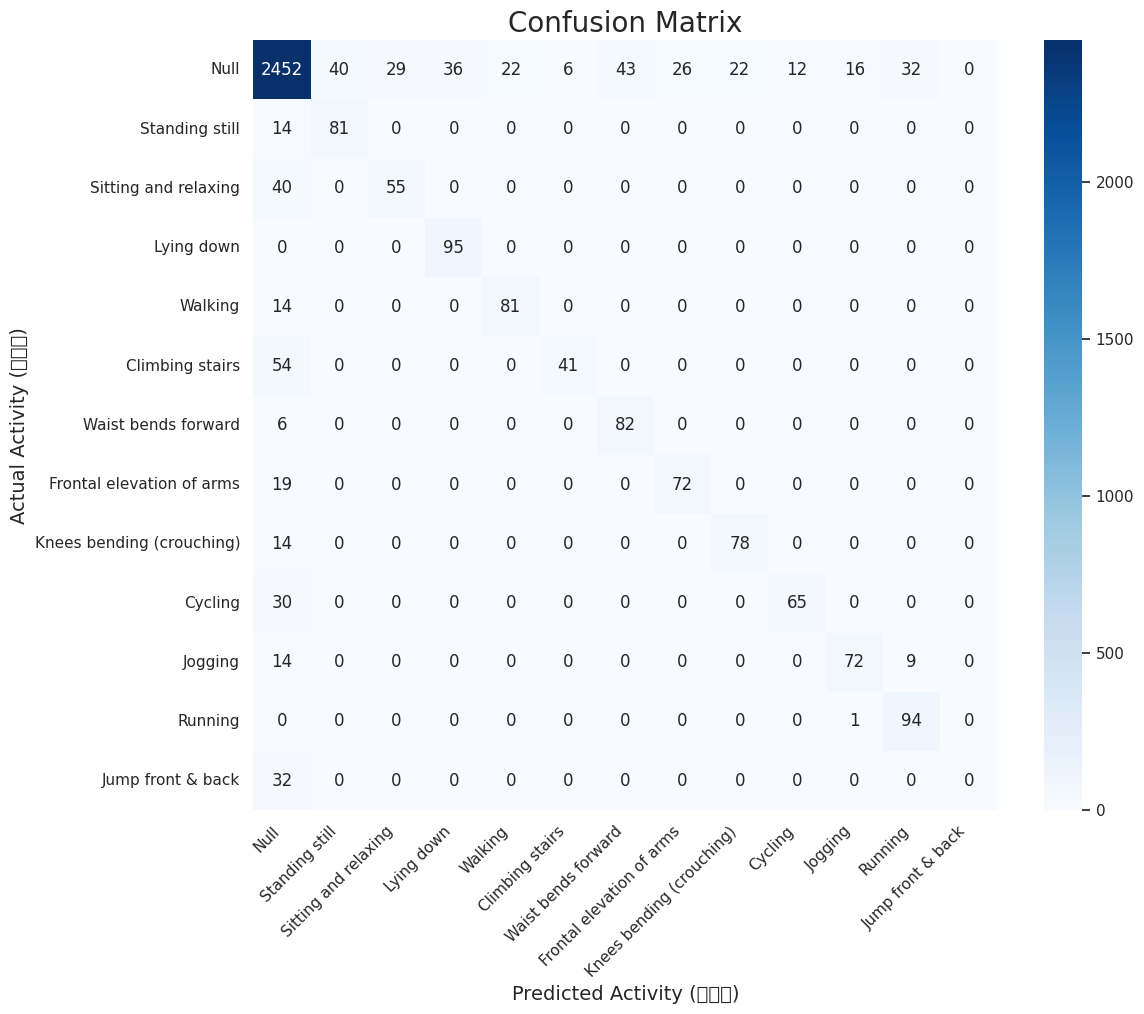

üìä ÏµúÏ¢Ö ÌèâÍ∞Ä Ï†êÏàò
Accuracy Score: 86.0226%
Precision Score: 70.3086%
Recall Score: 73.9571%
F1 Score: 70.8078%


In [24]:
results_summarizer(y_true, y_pred)